# Car Price Influencers Analysis Assignment - Answer Sheet

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

>1. Which variables are significant in predicting the price of a car
>2. How well those variables describe the price of a car

### <font color=blue>**Overall Approach Followed**</font>:  
1. Reading and Understanding Data 
    - Understanding the number of rows and columns, data types, column names etc.
    - Checking for Data Quality issues if any
2. Visualizing Data
    - Checking correlation between numeric variables
    - Performing pandas profiling as part of univariate analysis
3. Data Preparation
    - Separating CarCompany names
    - Identifying numeric and categorical variables
    - Handling categorical variables 
        - Coverting categorical variables to dummy variables or label encoding them as required
    - Ensuring that only numeric variables remain (all strings get converted to numeric values)
4. Splitting into train-test data sets
5. Scaling on Train data set
    - Scale all variables except the dummy variables
6. Dividing train data set to y_train and x_train
7. Performing Manual Modelling exercise
    - Checking the Adj. R-squared, p-values, VIF and F-statistic
    - Building a LR model by iteratively adding and removing variables based on values of above parameters
8. Residual Analysis
    - Check if the error terms are normally distributed
9. Making Predictions using the Final Model
    - Predict on the test data using the Final Model
10. Model Evaluation
    - Plotting y_test vs. y_pred
    - Calculating r2_score
11. Building our Model using RFE (automated approach)
    - Validating if the model built using manual approach is sufficient or can be further enhanced
    - Building model using statsmodel, for the detailed statistics
12. Final Conclusion based on the variables obtained
    - Technical Conclusion
    - Business Conclusion

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling



  Stored in directory: C:\Users\91810\AppData\Local\pip\Cache\wheels\45\10\b5\5565b02c204a3bb87490a22e0e4c382ea06337bb79fd74d58a
  Stored in directory: C:\Users\91810\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\91810\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [14]:
import pandas_profiling

# 1. Reading and Understanding Data

In [3]:
# Importing the dataset
car_price_df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
#EDA - Understanding the Structure of Data
car_price_df.shape 

(205, 26)

In [5]:
car_price_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Confirming for Null Values across Columns
car_price_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Checking for Null Values across any of the rows
any(car_price_df.isnull().any(axis=1))

False

In [8]:
# Checking for duplicate rows

car_price_df_update = car_price_df.drop_duplicates(keep='first') 

print(car_price_df.shape)
print(car_price_df_update.shape)

(205, 26)
(205, 26)


#### Inference - There are no Null values across rows or columns and there are no duplicate rows

# 2. Visualizing Data

>1. Visualizing correlations in numeric data. Helps to identify cases of Multi-collinearity
>2. Identifying categorical variables

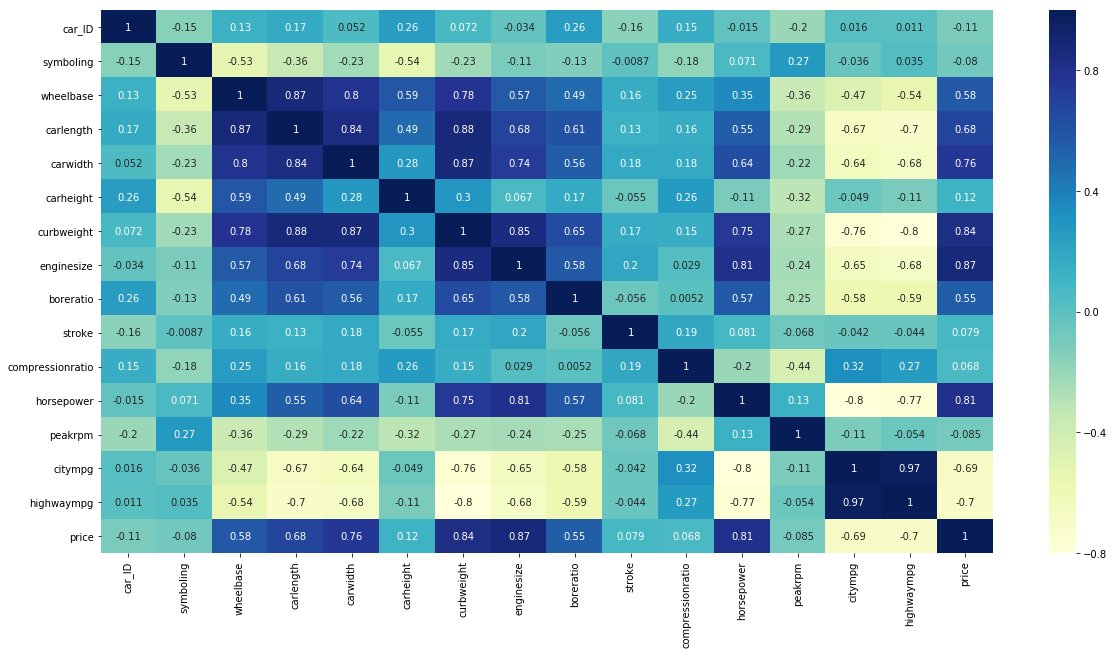

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(car_price_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Inference - 
>1. There are lots of strong correlations evident from the heat map above, especially between wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreration 
>2. There could be issues regarding multi-collinearity when the model is built

In [15]:
pandas_profiling.ProfileReport(car_price_df)

In [16]:
# Identifying Categorical data
car_price_df.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# 3. Data Preparation

In [17]:
# Splitting CarNames to 'Car Company' and 'Car Model', as we need to consider only 'Car Company' for modelling

car_price_df['CarCompany'] = [car_price_df['CarName'].iloc[i].split(' ')[0] for i in range(len(car_price_df))]
car_price_df.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   

     price   CarCompany  
0  13495.0  alfa-romero  
1  16500.0  alfa-romero  
2  16500.0  alfa-romero  
3  13950.0         audi  
4  17450.0         audi  

[5 rows x 27 columns]

In [18]:
# Counting the number of unique values per column
car_price_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
CarCompany           28
dtype: int64

In [19]:
# checking unique values of CarCompany to see if all the brand names are mentioned correctly or any names need to be fixed
pd.unique(car_price_df['CarCompany'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
# Following changes need to be made
# volkswagen << vokswagen = vw
# mazda << maxda
# porsche << porcshce
# nissan << Nissan
# toyota << toyouta

In [21]:
car_price_df.loc[car_price_df['CarCompany'] == 'maxda','CarCompany'] = 'mazda'
car_price_df.loc[car_price_df['CarCompany'] == 'porcshce','CarCompany'] = 'porsche'
car_price_df.loc[car_price_df['CarCompany'] == 'Nissan','CarCompany'] = 'nissan'
car_price_df.loc[car_price_df['CarCompany'] == 'toyouta','CarCompany'] = 'toyota'
car_price_df.loc[car_price_df['CarCompany'] == 'vokswagen','CarCompany'] = 'volkswagen'
car_price_df.loc[car_price_df['CarCompany'] == 'vw','CarCompany'] = 'volkswagen'

In [22]:
# Re-checking unique values to confirm changes
pd.unique(car_price_df['CarCompany'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
car_price_df['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [24]:
# Identifying Numeric Columns
cols = car_price_df.columns
num_cols = car_price_df._get_numeric_data().columns

print(num_cols)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [25]:
# Non-numeric Columns
non_num_cols = list(set(cols) - set(num_cols))
print(car_price_df[non_num_cols].head(5))

  enginetype   CarCompany cylindernumber fuelsystem drivewheel      carbody  \
0       dohc  alfa-romero           four       mpfi        rwd  convertible   
1       dohc  alfa-romero           four       mpfi        rwd  convertible   
2       ohcv  alfa-romero            six       mpfi        rwd    hatchback   
3        ohc         audi           four       mpfi        fwd        sedan   
4        ohc         audi           five       mpfi        4wd        sedan   

  fueltype                   CarName doornumber enginelocation aspiration  
0      gas        alfa-romero giulia        two          front        std  
1      gas       alfa-romero stelvio        two          front        std  
2      gas  alfa-romero Quadrifoglio        two          front        std  
3      gas               audi 100 ls       four          front        std  
4      gas                audi 100ls       four          front        std  


In [26]:
car_price_df[non_num_cols].nunique()

enginetype          7
CarCompany         22
cylindernumber      7
fuelsystem          8
drivewheel          3
carbody             5
fueltype            2
CarName           147
doornumber          2
enginelocation      2
aspiration          2
dtype: int64

#### Categorical variables:
fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem

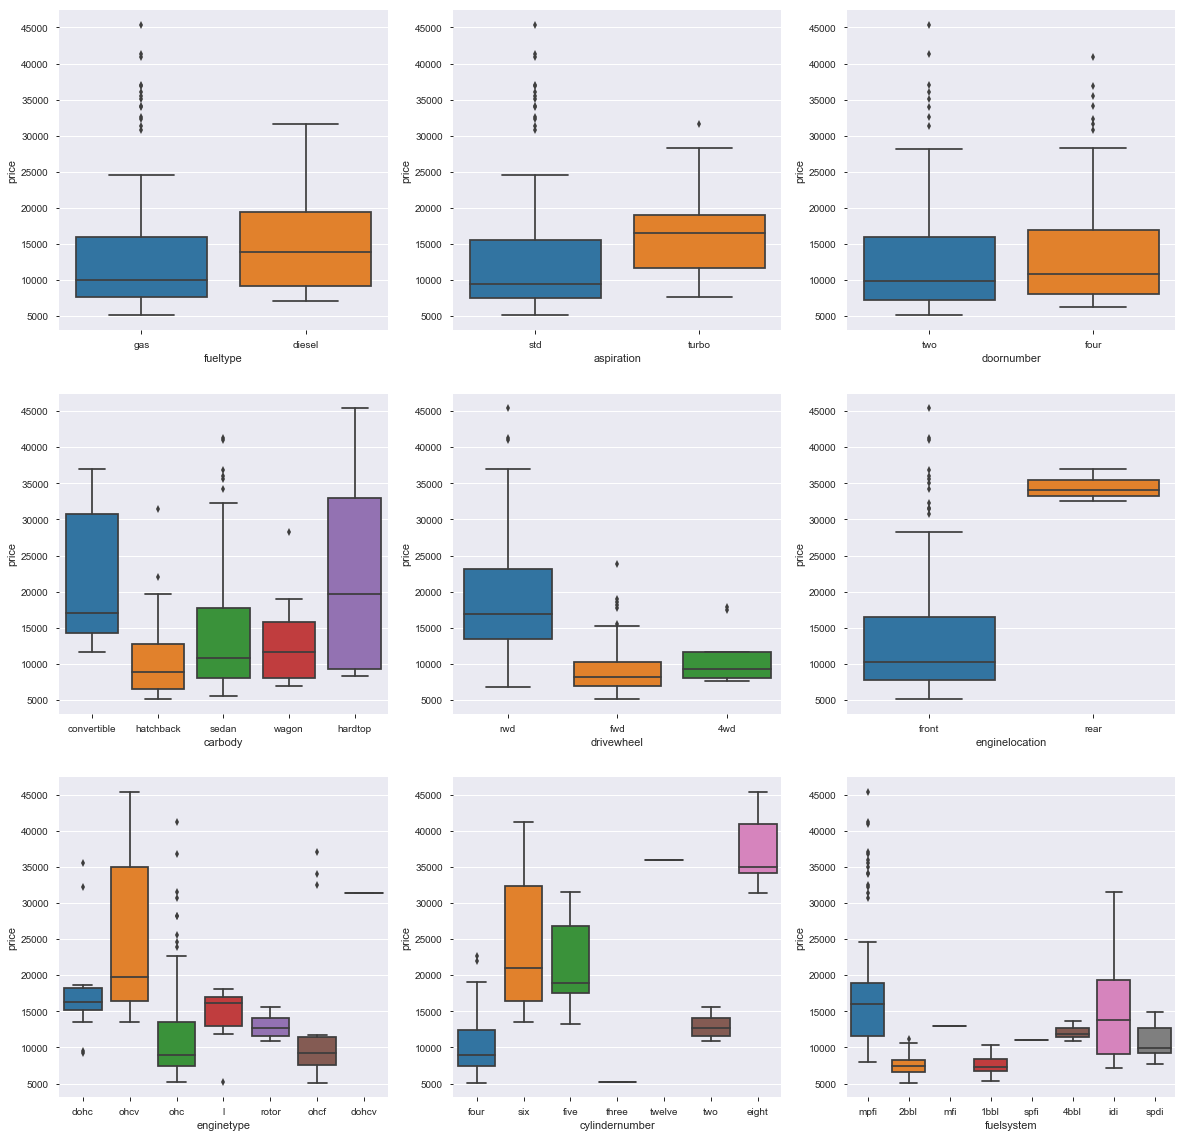

In [27]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_price_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price_df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price_df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price_df)
plt.show()

### Handling Dummy Variables

In [28]:
# Map categorical variables to numeric values to be able to include them in the LR model

#car_price_df['fueltype'] = car_price_df[['fueltype']].apply(lambda x:x.map({'gas':0,'diesel':1}))
fueltype = pd.get_dummies(car_price_df['fueltype'], drop_first = True)
car_price_df = pd.concat([car_price_df,fueltype],axis=1)

In [29]:
#car_price_df['aspiration'] = car_price_df[['aspiration']].apply(lambda x:x.map({'std':0,'turbo':1}))
aspiration = pd.get_dummies(car_price_df['aspiration'], drop_first = True)
car_price_df = pd.concat([car_price_df,aspiration],axis=1)

enginelocation = pd.get_dummies(car_price_df['enginelocation'], drop_first = True)
car_price_df = pd.concat([car_price_df,enginelocation],axis=1)

car_price_df['doornumber'] = car_price_df[['doornumber']].apply(lambda x:x.map({'two':2,'four':4}))

In [30]:
# Getting Dummies for remaining categorical variables

drivewheel = pd.get_dummies(car_price_df['drivewheel'], drop_first = True)
car_price_df = pd.concat([car_price_df,drivewheel],axis=1)

In [31]:
car_price_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany', 'gas', 'turbo', 'rear', 'fwd', 'rwd'],
      dtype='object')

In [32]:
carbody = pd.get_dummies(car_price_df['carbody'], drop_first = True)
car_price_df = pd.concat([car_price_df,carbody],axis=1)

enginetype = pd.get_dummies(car_price_df['enginetype'], drop_first = True)
car_price_df = pd.concat([car_price_df,enginetype],axis=1)

fuelsystem = pd.get_dummies(car_price_df['fuelsystem'], drop_first = True)
car_price_df = pd.concat([car_price_df,fuelsystem],axis=1)

In [33]:
car_price_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany', 'gas', 'turbo', 'rear', 'fwd', 'rwd', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [34]:
# Converting values of cylindernumber to numeric equivalents
car_price_df['cylindernumber'] = car_price_df[['cylindernumber']].apply(lambda x:x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}))

In [35]:
# Dropping non-numeric columns which were converted to numeric values

car_price_df.drop(['fueltype','aspiration','enginelocation','carbody','drivewheel','enginetype','fuelsystem'], axis = 1, inplace = True)

In [36]:
car_price_df.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany', 'gas',
       'turbo', 'rear', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [37]:
# Checking if any string (object) type variables remaining

car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 42 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
doornumber          205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
CarCompany          205 non-null object
gas                 205 non-null uint8
turbo               205 non-null uint8
rear               

#### Inference - Only CarName and CarCompany are of Object / String type

In [38]:
carcompany = pd.get_dummies(car_price_df['CarCompany'],drop_first = True)
car_price_df = pd.concat([car_price_df,carcompany], axis=1)

In [39]:
# Dropping the String variables along with car_ID which will be of no use here

car_price_df.drop(['CarName','CarCompany','car_ID'],axis=1, inplace=True)

In [40]:
# Re-checking the data types of variables in the data frame 
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling           205 non-null int64
doornumber          205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
rear                205 non-null uint8
fwd                 205 non-null uint8
rwd                 205 non-null uint8
hardtop             2

#### Inference - No string type variables remaining

# 4. Splitting train-test data

In [41]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_price_df_train, car_price_df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
# Rescaling - Checking the column mean values to understand the range 

pd.set_option('display.max_columns', 70)

#car_price_df_train.agg([min,max])
car_price_df_train.describe()

symboling  doornumber   wheelbase   carlength    carwidth   carheight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.797203    3.118881   98.523077  173.416783   65.839860   53.551748   
std      1.195999    0.996399    5.961835   12.598122    2.214203    2.433766   
min     -2.000000    2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000    2.000000   94.500000  165.650000   63.950000   51.800000   
50%      1.000000    4.000000   96.500000  172.000000   65.400000   53.700000   
75%      1.000000    4.000000  101.200000  182.300000   66.900000   55.350000   
max      3.000000    4.000000  115.600000  202.600000   72.300000   59.100000   

        curbweight  cylindernumber  enginesize   boreratio      stroke  \
count   143.000000      143.000000  143.000000  143.000000  143.000000   
mean   2539.510490        4.405594  124.958042    3.307413    3.250070   
std     544.650539        1.158178   40.974034    0.260997    0.312529   
min    1488.000000        2.000000   61.000000    2.680000    2.190000   
25%    2121.000000        4.000000   97.000000    3.065000    3.110000   
50%    2405.000000        4.000000  110.000000    3.310000    3.270000   
75%    2930.500000        4.000000  141.000000    3.540000    3.400000   
max    4066.000000       12.000000  326.000000    3.940000    4.170000   

       compressionratio  horsepower      peakrpm     citympg  highwaympg  \
count        143.000000  143.000000   143.000000  143.000000  143.000000   
mean          10.052587  102.552448  5130.069930   25.391608   30.874126   
std            3.794890   39.722750   481.273979    6.701939    6.973660   
min            7.000000   48.000000  4150.000000   13.000000   17.000000   
25%            8.600000   70.000000  4800.000000   19.000000   25.000000   
50%            9.000000   94.000000  5200.000000   25.000000   31.000000   
75%            9.400000  116.000000  5500.000000   31.000000   36.500000   
max           23.000000  288.000000  6600.000000   49.000000   54.000000   

              price         gas       turbo        rear         fwd  \
count    143.000000  143.000000  143.000000  143.000000  143.000000   
mean   13056.347322    0.909091    0.181818    0.006993    0.594406   
std     7807.036883    0.288490    0.387050    0.083624    0.492733   
min     5118.000000    0.000000    0.000000    0.000000    0.000000   
25%     7554.000000    1.000000    0.000000    0.000000    0.000000   
50%    10198.000000    1.000000    0.000000    0.000000    1.000000   
75%    16465.000000    1.000000    0.000000    0.000000    1.000000   
max    41315.000000    1.000000    1.000000    1.000000    1.000000   

              rwd     hardtop   hatchback       sedan       wagon       dohcv  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.349650    0.020979    0.342657    0.475524    0.132867    0.006993   
std      0.478536    0.143818    0.476266    0.501156    0.340624    0.083624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                l         ohc        ohcf        ohcv       rotor        2bbl  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.062937    0.685315    0.083916    0.062937    0.027972    0.349650   
std      0.243703    0.466023    0.278236    0.243703    0.165472    0.478536   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0

#### Outcome
>1. We can see that scaling is required as some columns have 
>2. Values in 1000s (e.g. peakrpm, curbweight, price)
>3. Some in 100s (e.g. carlength, horsepower) and 
>4. Others in 10s (e.g. compressionration, citympg) or 0-1 (most of dummy variables)

##### This requires scaling

# 5. Scaling on Train data set

In [43]:
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize',
           'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

car_price_df_train[num_vars] = scaler.fit_transform(car_price_df_train[num_vars])

C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
car_price_df_train.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122        0.6         1.0   0.244828   0.426016  0.291667   0.265487   
125        1.0         0.0   0.272414   0.452033  0.666667   0.212389   
166        0.6         0.0   0.272414   0.448780  0.308333   0.424779   
1          1.0         0.0   0.068966   0.450407  0.316667   0.088496   
199        0.2         1.0   0.610345   0.775610  0.575000   0.858407   

     curbweight  cylindernumber  enginesize  boreratio    stroke  \
122    0.272692             0.2    0.139623   0.230159  0.525253   
125    0.500388             0.2    0.339623   1.000000  0.464646   
166    0.314973             0.2    0.139623   0.444444  0.449495   
1      0.411171             0.2    0.260377   0.626984  0.247475   
199    0.647401             0.2    0.260377   0.746032  0.484848   

     compressionratio  horsepower   peakrpm   citympg  highwaympg     price  \
122           0.15000    0.083333  0.551020  0.500000    0.567568  0.068818   
125           0.15625    0.395833  0.551020  0.166667    0.270270  0.466890   
166           0.15000    0.266667  1.000000  0.361111    0.324324  0.122110   
1             0.12500    0.262500  0.346939  0.222222    0.270270  0.314446   
199           0.03125    0.475000  0.387755  0.111111    0.135135  0.382131   

     gas  turbo  rear  fwd  rwd  hardtop  hatchback  sedan  wagon  dohcv  l  \
122    1      0     0    1    0        0          0      1      0      0  0   
125    1      0     0    0    1        0          1      0      0      0  0   
166    1      0     0    0    1        0          1      0      0      0  0   
1      1      0     0    0    1        0          0      0      0      0  0   
199    1      1     0    0    1        0          0      0      1      0  0   

     ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  \
122    1     0     0      0     1     0    0    0     0     0     0     0   
125    1     0     0      0     0     0    0    0     1     0     0     0   
166    0     0     0      0     0     0    0    0     1     0     0     0   
1      0     0     0      0     0     0    0    0     1     0     0     0   
199    1     0     0      0     0     0    0    0     1     0     0     0   

     bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  \
122    0      0          0      0      0      0       0      0        0   
125    0      0          0      0      0      0       0      0        0   
166    0      0          0      0      0      0       0      0        0   
1      0      0          0      0      0      0       0      0        0   
199    0      0          0      0      0      0       0      0        0   

     mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  \
122           0       0        0         1        0        0     0       0   
125           0       0        0         0        1        0     0       0   
166           0       0        0         0        0        0     0       0   
1             0       0        0         0        0        0     0       0   
199           0       0        0         0        0        0     0       0   

     toyota  volkswagen  volvo  
122       0           0      0  
125       0           0      0  
166       1           0      0  
1         0           0      0  
199       0           0      1

In [46]:
car_price_df_train.describe()

symboling  doornumber   wheelbase   carlength    carwidth   carheight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.559441    0.559441    0.411141    0.525476    0.461655    0.509004   
std      0.239200    0.498199    0.205581    0.204848    0.184517    0.215378   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.000000    0.272414    0.399187    0.304167    0.353982   
50%      0.600000    1.000000    0.341379    0.502439    0.425000    0.522124   
75%      0.600000    1.000000    0.503448    0.669919    0.550000    0.668142   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       curbweight  cylindernumber  enginesize   boreratio      stroke  \
count  143.000000      143.000000  143.000000  143.000000  143.000000   
mean     0.407878        0.240559    0.241351    0.497946    0.535389   
std      0.211269        0.115818    0.154619    0.207140    0.157843   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.245539        0.200000    0.135849    0.305556    0.464646   
50%      0.355702        0.200000    0.184906    0.500000    0.545455   
75%      0.559542        0.200000    0.301887    0.682540    0.611111   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

       compressionratio  horsepower     peakrpm     citympg  highwaympg  \
count        143.000000  143.000000  143.000000  143.000000  143.000000   
mean           0.190787    0.227302    0.400029    0.344211    0.374976   
std            0.237181    0.165511    0.196438    0.186165    0.188477   
min            0.000000    0.000000    0.000000    0.000000    0.000000   
25%            0.100000    0.091667    0.265306    0.166667    0.216216   
50%            0.125000    0.191667    0.428571    0.333333    0.378378   
75%            0.150000    0.283333    0.551020    0.500000    0.527027   
max            1.000000    1.000000    1.000000    1.000000    1.000000   

            price         gas       turbo        rear         fwd         rwd  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.219310    0.909091    0.181818    0.006993    0.594406    0.349650   
std      0.215682    0.288490    0.387050    0.083624    0.492733    0.478536   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.067298    1.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.140343    1.000000    0.000000    0.000000    1.000000    0.000000   
75%      0.313479    1.000000    0.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          hardtop   hatchback       sedan       wagon       dohcv           l  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.020979    0.342657    0.475524    0.132867    0.006993    0.062937   
std      0.143818    0.476266    0.501156    0.340624    0.083624    0.243703   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              ohc        ohcf        ohcv       rotor        2bbl        4bbl  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.685315    0.083916    0.062937    0.027972    0.349650    0.020979   
std      0.466023    0.278236    0.243703    0.165472    0.478536    0.143818   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  

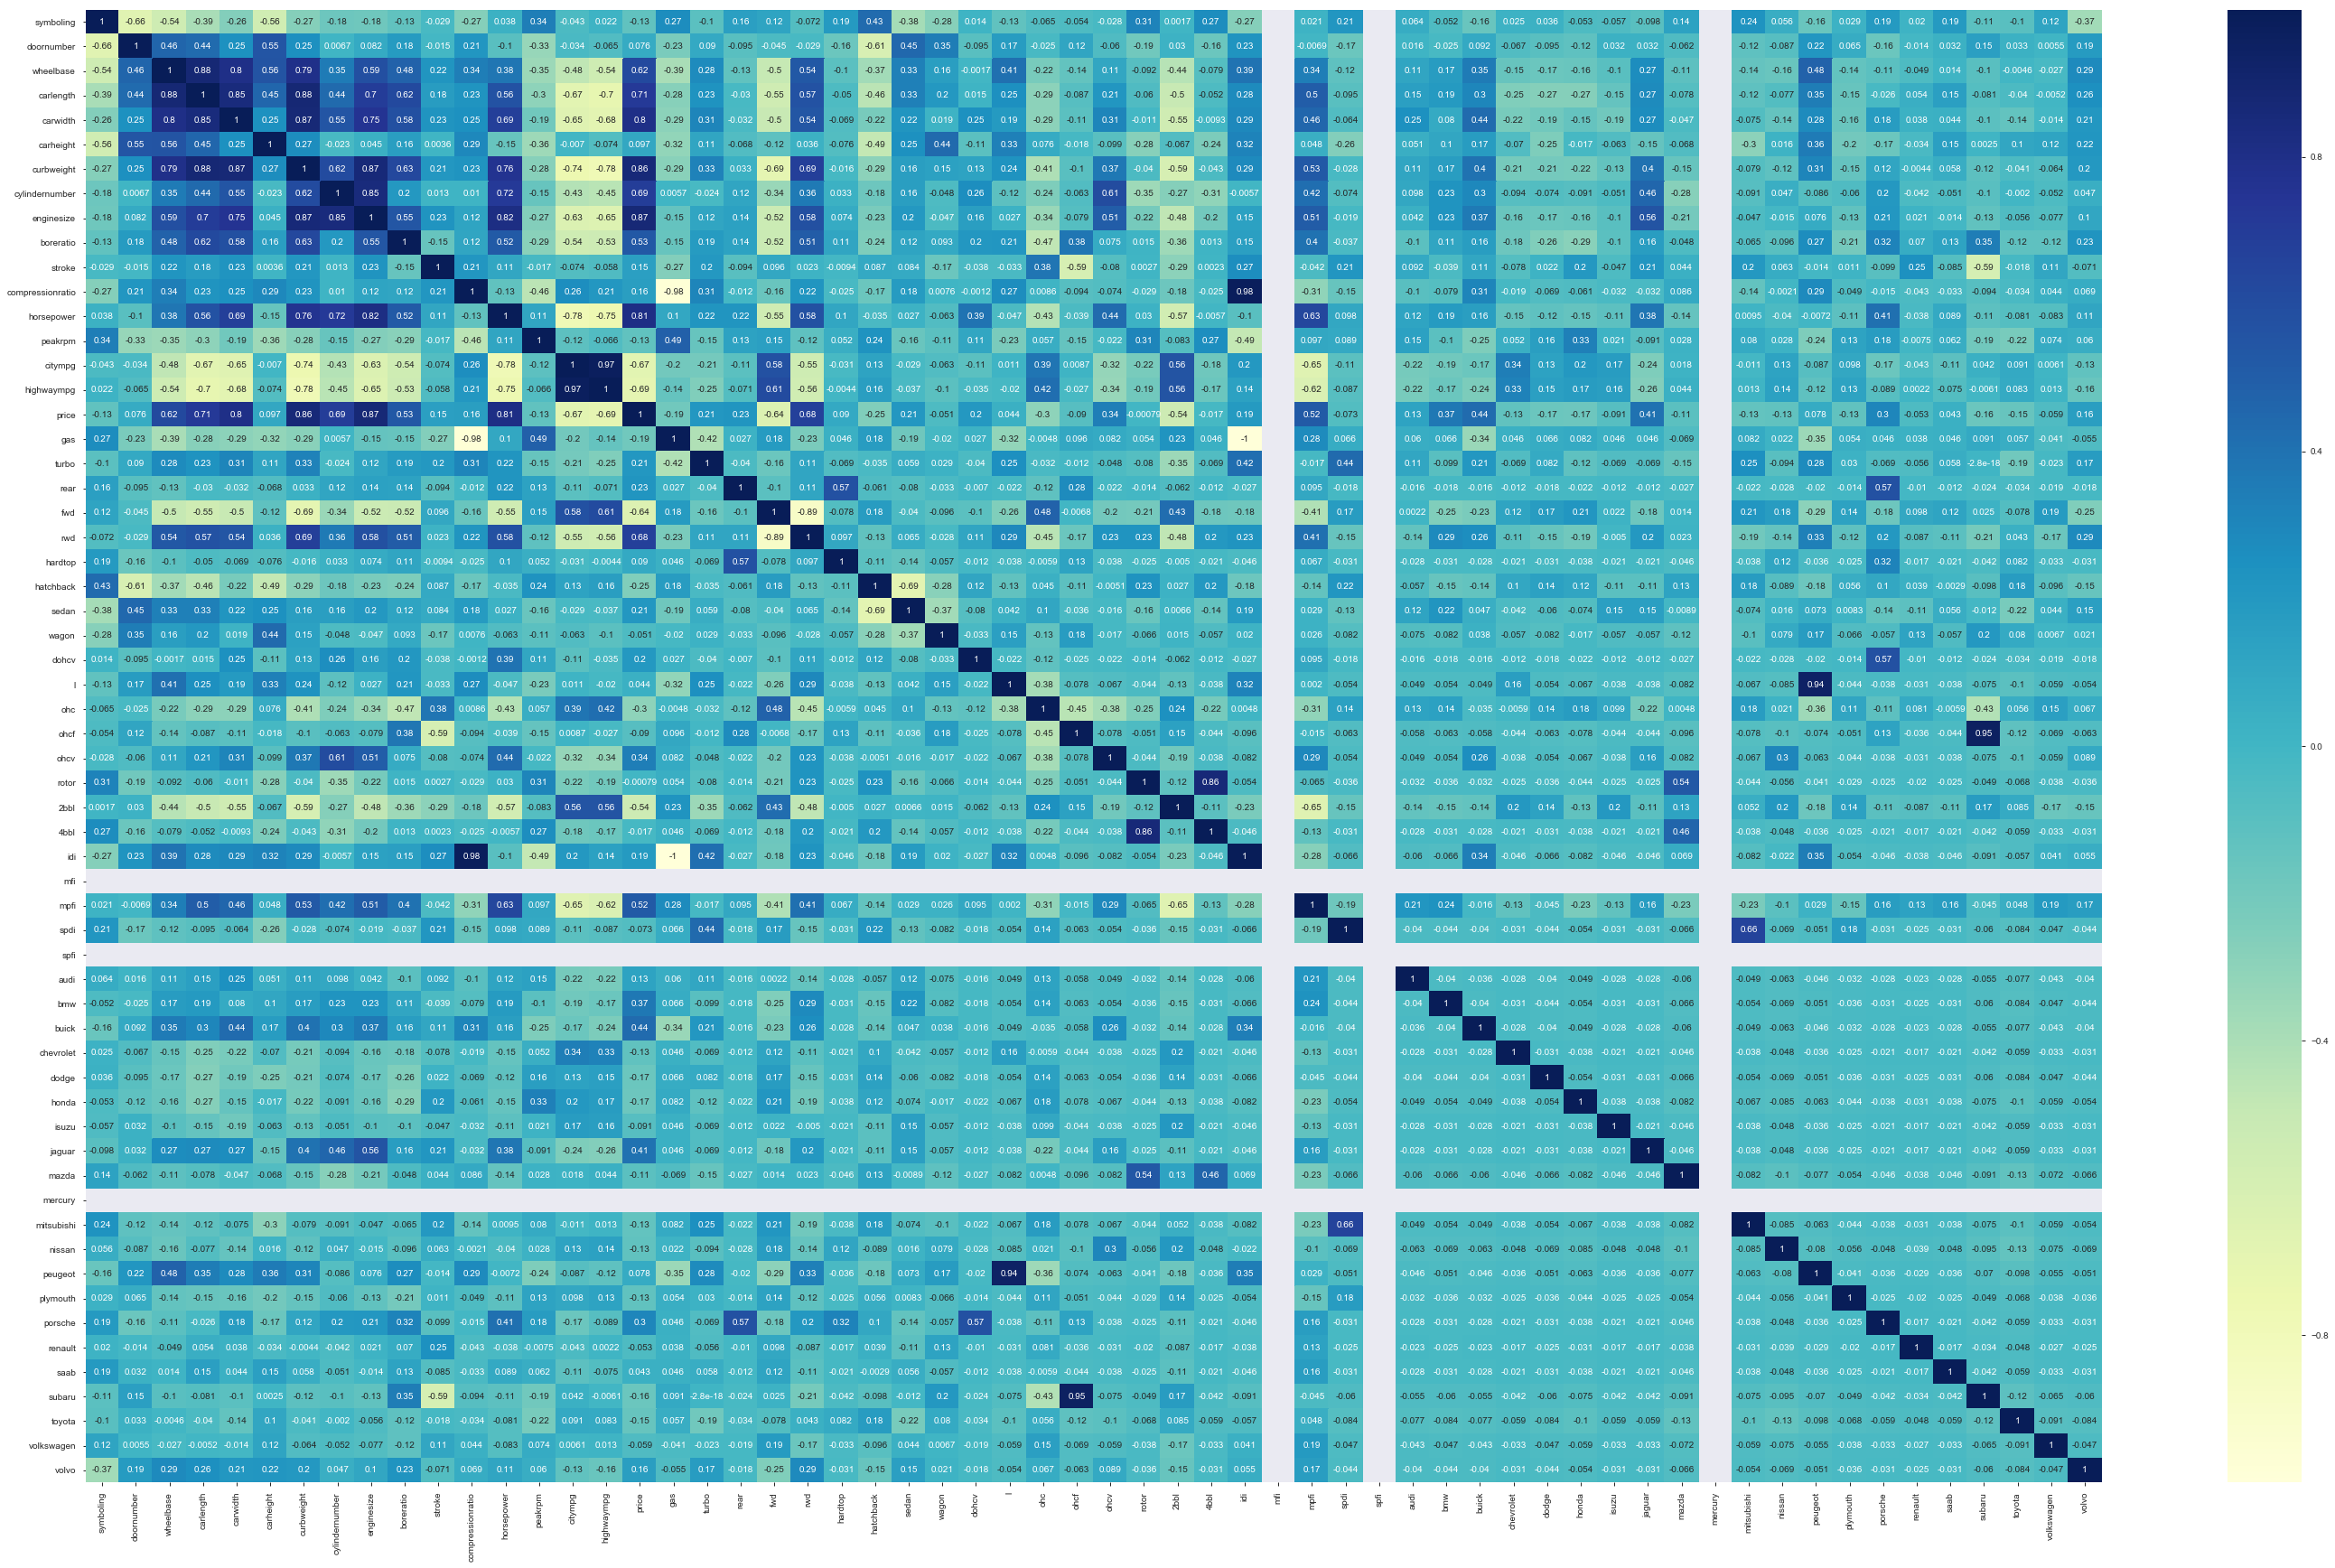

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 30))
sns_plot = sns.heatmap(car_price_df_train.corr(), annot = True, cmap="YlGnBu")
#plt.show()
sns_plot.figure.savefig("heatmap2.png")

In [48]:
pandas_profiling.ProfileReport(car_price_df_train)

In [49]:
# Dataframe of price correlations with other columns
price_corr_df = pd.DataFrame({'columns':list(car_price_df_train.columns),'corr':list(car_price_df_train.corr()['price'])})
#list(car_price_df.corr()['price'])
#car_price_df.columns

In [50]:
price_corr_df.head()

columns      corr
0   symboling -0.129859
1  doornumber  0.075936
2   wheelbase  0.622591
3   carlength  0.713749
4    carwidth  0.799380

In [51]:
# list of strong correlations with price (+ve and -ve)
price_corr_df[(price_corr_df['corr']>=0.5)|(price_corr_df['corr']<=-0.5)]

columns      corr
2        wheelbase  0.622591
3        carlength  0.713749
4         carwidth  0.799380
6       curbweight  0.861860
7   cylindernumber  0.692424
8       enginesize  0.867915
9        boreratio  0.533591
12      horsepower  0.806183
14         citympg -0.674290
15      highwaympg -0.688389
16           price  1.000000
20             fwd -0.635202
21             rwd  0.677169
32            2bbl -0.537919
36            mpfi  0.519993

In [52]:
# Extract column names that have high correlation with price
price_cols_highcorr_list = list(price_corr_df[(price_corr_df['corr']>=0.5)|(price_corr_df['corr']<=-0.5)]['columns'])

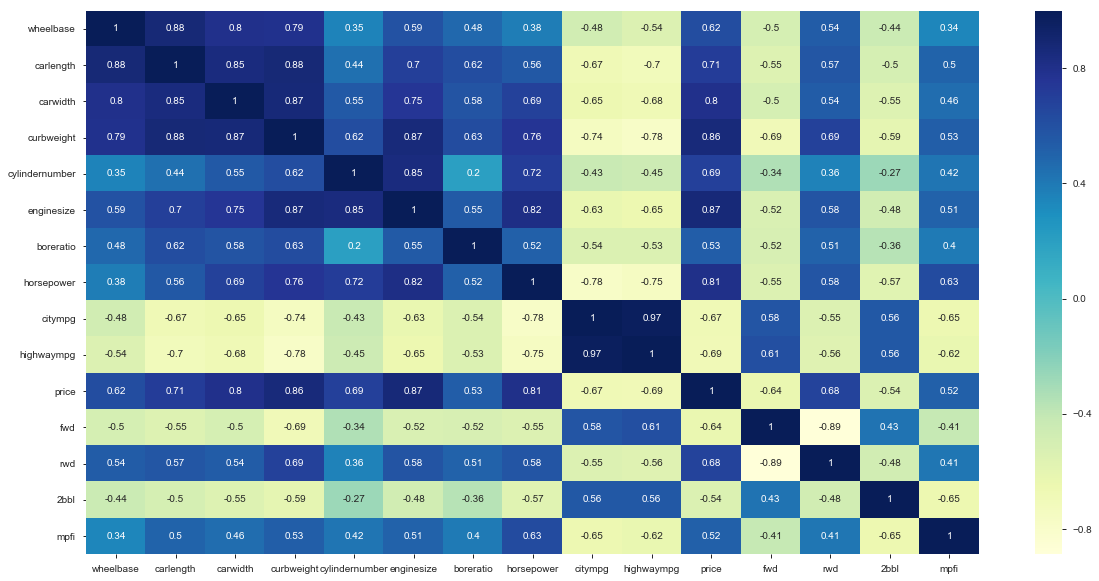

In [53]:
# Check correlation of this subset of columns among themselves for multi-collinearity check
plt.figure(figsize=(20,10))
sns.heatmap(car_price_df_train[price_cols_highcorr_list].corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Inference - Lot of strong correlations between variables. There could be issues regarding multi-collinearity which need to be considered

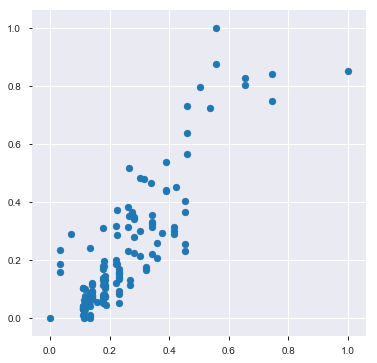

In [54]:
# price has highest correlation with enginesize
plt.figure(figsize=[6,6])
plt.scatter(car_price_df_train.enginesize, car_price_df_train.price)
plt.show()

#### So we pick enginesize as first variable for LR model building

# 6. Dividing into X and Y sets for Model Building

In [55]:
y_train = car_price_df_train.pop('price')
X_train = car_price_df_train

# 7. Performing Manual Modelling exercise

In [56]:
# Building Linear Model using StatsModels
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
# Check parameters obtained

lr_1.params

const        -0.072888
enginesize    1.210676
dtype: float64

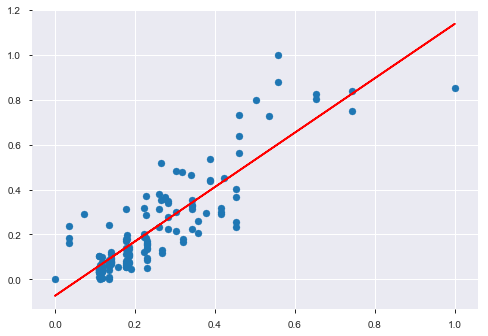

In [58]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.enginesize, y_train)
plt.plot(X_train_lm.enginesize, -0.072888 + 1.210676*X_train_lm.enginesize, 'r')
plt.show()

In [59]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.09e-44
Time:                        07:26:49   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Inference
>1. Adj. R-squared is 0.75 which is very high for a start
>2. Lets see if this can be improved by adding more variables which have high correlation with price

In [60]:
# Next highly correlated variable is curbweight
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight']])

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.31e-50
Time:                        07:27:04   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

### Inference
>1. Adj. R-squared has increased to 0.799
>2. Lets see if this can be improved by adding more vairbales which have high correlation with price

In [62]:
# Next highly correlated variable is horsepower
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower']])

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.16e-51
Time:                        07:27:24   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

### Inference
>1. Adj. R-squared has increased further to 0.815
>2. Lets see if this can be improved by adding more vairbales which have high correlation with price

In [64]:
# Next highly correlated variable is carwdith
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth']])

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.91e-51
Time:                        07:27:29   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

### Inference
>1. Adj. R-squared has increased further to 0.821
>2. Lets see if this can be improved by adding more vairbales which have high correlation with price

In [66]:
# Next highly correlated variable is carlength
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','carlength']])

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.45e-50
Time:                        07:27:39   Log-Likelihood:                 142.79
No. Observations:                 143   AIC:                            -273.6
Df Residuals:                     137   BIC:                            -255.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1469      0.023     -6.258      0.0

### Inference
>1. Adj. R-squared has increased further to 0.822
>2. However, the p-value of the coefficient for carlength is 0.276 which is >> 0.05. Therefore, this may be insignificant
>3. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [68]:
# Next highly correlated variable is cylindernumber and highwaympg. Adding one after the other
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','carlength','cylindernumber']])

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.58e-49
Time:                        07:27:52   Log-Likelihood:                 142.90
No. Observations:                 143   AIC:                            -271.8
Df Residuals:                     136   BIC:                            -251.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1389      0.029     -4.

#### Inference
>1. Adj. R-squared has almost remained constant at 0.821
>2. However, the p-value of the coefficient for cylindernumber is 0.647 which is >> 0.05. Therefore, this may be insignificant
>3. Dropping cynlindernumber based on p-value and not improving Adj. R-squared
>4. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [70]:
# Next highly correlated variable is highwaympg
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','carlength','highwaympg']])

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     109.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.73e-49
Time:                        07:28:34   Log-Likelihood:                 142.81
No. Observations:                 143   AIC:                            -271.6
Df Residuals:                     136   BIC:                            -250.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1559      0.058     -2.689      0.0

### Inference
>1. Adj. R-squared has almost remained constant at 0.820
>2. However, the p-value of the coefficient for highwaympg is 0.865 which is >> 0.05. Therefore, this may be insignificant
>3. Dropping highwaympg based on p-value and not improving Adj. R-squared
>4. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [72]:
# Next highly correlated variable is rwd
X_train_lm = sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','carlength','rwd']])

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.07e-52
Time:                        07:29:15   Log-Likelihood:                 149.51
No. Observations:                 143   AIC:                            -285.0
Df Residuals:                     136   BIC:                            -264.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1335      0.023     -5.861      0.0

### Inference
>1. Adj. R-squared has increased further to 0.836
>2. p-value of carlength and curbweight is >> 0.05, therefore, dropping them
>2. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [74]:
# Next highly correlated variable is citympg
X_train_lm = sm.add_constant(X_train[['enginesize','horsepower','carwidth','citympg']])

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [75]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.25e-50
Time:                        07:31:24   Log-Likelihood:                 139.23
No. Observations:                 143   AIC:                            -268.5
Df Residuals:                     138   BIC:                            -253.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1330      0.048     -2.758      0.0

### Inference
>1. Adj. R-squared has dropped to 0.814
>2. Also, the p-value of the coefficient for citympg is 0.488 which is >> 0.05. Therefore, this may be insignificant
>3. Dropping citympg based on p-value and not improving Adj. R-squared
>4. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [76]:
# Next highly correlated variable is fwd
X_train_lm = sm.add_constant(X_train[['enginesize','horsepower','carwidth','fwd']])

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.64e-54
Time:                        07:32:44   Log-Likelihood:                 148.23
No. Observations:                 143   AIC:                            -286.5
Df Residuals:                     138   BIC:                            -271.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0724      0.029     -2.504      0.0

### Inference
>1. Adj. R-squared has increased to previous levels of 0.836
>2. Also, the p-value of the coefficients are in range
>3. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [78]:
# Next highly correlated variable is wheelbase
X_train_lm = sm.add_constant(X_train[['enginesize','horsepower','carwidth','fwd','wheelbase']])

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [79]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.10e-53
Time:                        07:34:20   Log-Likelihood:                 148.23
No. Observations:                 143   AIC:                            -284.5
Df Residuals:                     137   BIC:                            -266.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0728      0.030     -2.441      0.0

### Inference
>1. Adj. R-squared has almost remained same at previous levels of 0.835
>2. Also, the p-value of the coefficient for wheelbase is 0.951 which is >> 0.05. Therefore, these may be insignificant
>3. Dropping wheelbase as it is not significant and not improving Aj. R-Sqaured
>4. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [80]:
# Next highly correlated variable is 2bbl
X_train_lm = sm.add_constant(X_train[['enginesize','horsepower','carwidth','fwd','2bbl']])

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.33e-53
Time:                        07:35:17   Log-Likelihood:                 148.33
No. Observations:                 143   AIC:                            -284.7
Df Residuals:                     137   BIC:                            -266.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0651      0.033     -1.958      0.0

### Inference
>1. Adj. R-squared has almost remained same at previous levels of 0.835
>2. Also, the p-value of the coefficient for 2bbl is 0.653 which is >> 0.05. Therefore, these may be insignificant
>3. Dropping 2bbl as it is not significant and not improving Aj. R-Sqaured
>4. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [82]:
# Next highly correlated variable is mpfi
X_train_lm = sm.add_constant(X_train[['enginesize','horsepower','carwidth','fwd','mpfi']])

# Create a first fitted model
lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [83]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.88e-53
Time:                        07:38:15   Log-Likelihood:                 148.26
No. Observations:                 143   AIC:                            -284.5
Df Residuals:                     137   BIC:                            -266.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0721      0.029     -2.481      0.0

### Inference
>1. Adj. R-squared has almost remained same at previous levels of 0.835
>2. Also, the p-value of the coefficient for mpfi is 0.808 which is >> 0.05. Therefore, these may be insignificant
>3. Dropping mpfi as it is not significant and not improving Aj. R-Sqaured
>4. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

In [84]:
# Next highly correlated variable is boreratio
X_train_lm = sm.add_constant(X_train[['enginesize','horsepower','carwidth','fwd','boreratio']])

# Create a first fitted model
lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.67e-53
Time:                        07:39:12   Log-Likelihood:                 149.39
No. Observations:                 143   AIC:                            -286.8
Df Residuals:                     137   BIC:                            -269.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0487      0.033     -1.481      0.1

### Inference
>1. Adj. R-squared has increased to 0.837
>2. Also, the p-value of the coefficient for boreratio is 0.136 respectively which is >> 0.05. Therefore, has to be dropped
>3. Lets see however, if Adj. R-squared can be improved by adding more vairbales which have high correlation with price

## Inference till now
>1. Just by considering the variables highly correlated to price and then p-value we have formed following pool of variables that produce a Adj. R-sqaured value of 0.836 - ['enginesize','horsepower','carwidth','fwd']
>2. Variables dropped [cylindernumber, highwaympg, carlength, curbweight, citympg, wheelbase, 2bbl, mpfi, boreratio
>3. VIF has not been yet considered as this was an initial manual exercise to understand the influence of different variables and possibilities

## Next - trying all variables that are highly correlated with price...i.e. all together

In [87]:
price_cols_highcorr_list.remove('price')

In [88]:
X_train_lm = sm.add_constant(X_train[price_cols_highcorr_list])

# Create a first fitted model
lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     50.93
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.33e-45
Time:                        07:50:33   Log-Likelihood:                 151.56
No. Observations:                 143   AIC:                            -273.1
Df Residuals:                     128   BIC:                            -228.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0630      0.077     -0.

### Inference
>1. Adj. R-squared has reduced to 0.831
>2. Also, the p-value of the coefficient for many variables is >> 0.05. Therefore, these may be insignificant

## Next - trying out all variables irrespective of the fact that they are not highly correlated with price

In [90]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [91]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.61e-50
Time:                        07:51:43   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1799      0.105  

#### Checking VIF - It is an important parameter tha gives a basic quantitative idea about how much the feature variables are correlated with each other. 
#### It is an extremely important parameter to test our linear model 

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
28              ohcf      inf
55            subaru      inf
18              rear      inf
16               gas  1101.96
33               idi   333.94
8         enginesize   234.03
11  compressionratio   230.50
7     cylindernumber    93.03
35              mpfi    66.24
12        horsepower    57.52
14           citympg    55.40
6         curbweight    52.75
31              2bbl    50.62
15        highwaympg    47.81
50           peugeot    39.64
9          boreratio    38.68
23             sedan    36.42
22         hatchback    29.01
3          carlength    28.87
2          wheelbase    26.11
4           carwidth    24.57
43             honda    24.47
56            toyota    23.58
24             wagon    19.49
26                 l    19.21
20               rwd    18.91
49            nissan    18.71
46             mazda    18.09
48        mitsubishi    15.93
27               ohc    14.11
58             volvo    13.66
40             buick    13.03
30             rotor    12.53
36              spdi    12.43
39               bmw    12.12
10            stroke    12.09
38              audi    11.30
57        volkswagen    10.51
42             dodge    10.32
19               fwd    10.31
52           porsche     9.87
32              4bbl     9.37
45            jaguar     9.21
17             turbo     9.05
5          carheight     8.98
51          plymouth     6.88
13           peakrpm     6.86
41         chevrolet     6.76
54              saab     6.75
25             dohcv     6.31
29              ohcv     6.03
44             isuzu     5.93
0          symboling     5.59
53           renault     5.37
21           hardtop     4.60
1         doornumber     4.04
34               mfi      NaN
37              spfi      NaN
47           mercury      NaN

### Based on overall p-value following variables are significant. Assuming p-value < 0.05 is acceptable

wheelbase, carwidth, carheight, curbweight, enginesize, boreratio, peakrpm, turbo, rear, hardtop, hatchback, sedan, l, ohcf, rotor, spfi, bmw, dodge, mercury, mitsubishi, peugeot, plymouth, porsche, saab

### Based on overall VIF following variables are significant. Assuming <5 is acceptable

hardtop, doornumber

In [94]:
# Next - trying out on above subset of variables 
X_train_subset1 = X_train[['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
                           'boreratio', 'peakrpm', 'turbo', 'rear', 'hardtop', 'hatchback', 'sedan', 
                           'l', 'ohcf', 'rotor', 'spfi', 'bmw', 'dodge', 'mercury', 'mitsubishi', 
                           'peugeot', 'plymouth', 'porsche', 'saab']]
X_train_lm = sm.add_constant(X_train_subset1)

# Create a first fitted model
lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [95]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.20e-61
Time:                        08:02:06   Log-Likelihood:                 215.18
No. Observations:                 143   AIC:                            -384.4
Df Residuals:                     120   BIC:                            -316.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0673      0.041     -1.652      0.1

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset1.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset1.values, i) for i in range(X_train_subset1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3   curbweight  90.73
1     carwidth  52.82
4   enginesize  44.34
0    wheelbase  36.75
5    boreratio  21.20
2    carheight  13.63
20     peugeot  10.80
12           l   9.80
6      peakrpm   6.42
11       sedan   4.94
10   hatchback   3.68
8         rear   2.71
22     porsche   2.37
14       rotor   2.24
7        turbo   2.24
13        ohcf   2.18
9      hardtop   1.70
19  mitsubishi   1.42
17       dodge   1.28
16         bmw   1.26
21    plymouth   1.17
23        saab   1.17
15        spfi    NaN
18     mercury    NaN

In [97]:
# Next - trying out on above subset of variables 
# based mostly on p-value <0.05 and considering VIF > 5 removing following
# ohcf, hardtop, peakrpm
X_train_subset2 = X_train[['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
                           'boreratio', 'turbo', 'rear', 'hatchback', 'sedan', 
                           'l', 'rotor', 'spfi', 'bmw', 'dodge', 'mercury', 'mitsubishi', 
                           'peugeot', 'plymouth', 'porsche', 'saab']]
X_train_lm = sm.add_constant(X_train_subset2)

# Create a first fitted model
lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [98]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     94.92
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.75e-64
Time:                        08:06:32   Log-Likelihood:                 213.67
No. Observations:                 143   AIC:                            -387.3
Df Residuals:                     123   BIC:                            -328.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0547      0.034     -1.588      0.1

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset2.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset2.values, i) for i in range(X_train_subset2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3   curbweight  87.46
1     carwidth  48.79
4   enginesize  41.92
0    wheelbase  34.13
2    carheight  12.35
5    boreratio  11.66
17     peugeot  10.63
10           l   9.78
9        sedan   4.42
8    hatchback   3.17
19     porsche   2.20
6        turbo   2.12
11       rotor   2.09
7         rear   1.82
16  mitsubishi   1.33
13         bmw   1.25
14       dodge   1.16
20        saab   1.13
18    plymouth   1.10
12        spfi    NaN
15     mercury    NaN

In [100]:
# Next - trying out on above subset of variables 
# based on p-value <0.05 removing following
# spfi, mercury
X_train_subset3 = X_train[['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
                           'boreratio', 'turbo', 'rear', 'hatchback', 'sedan', 
                           'l', 'rotor', 'bmw', 'dodge', 'mitsubishi', 
                           'peugeot', 'plymouth', 'porsche', 'saab']]
X_train_lm = sm.add_constant(X_train_subset3)

# Create a first fitted model
lr_19 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     94.92
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.75e-64
Time:                        08:08:24   Log-Likelihood:                 213.67
No. Observations:                 143   AIC:                            -387.3
Df Residuals:                     123   BIC:                            -328.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0547      0.034     -1.588      0.1

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset3.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset3.values, i) for i in range(X_train_subset3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3   curbweight  87.46
1     carwidth  48.79
4   enginesize  41.92
0    wheelbase  34.13
2    carheight  12.35
5    boreratio  11.66
15     peugeot  10.63
10           l   9.78
9        sedan   4.42
8    hatchback   3.17
17     porsche   2.20
6        turbo   2.12
11       rotor   2.09
7         rear   1.82
14  mitsubishi   1.33
12         bmw   1.25
13       dodge   1.16
18        saab   1.13
16    plymouth   1.10

In [103]:
# Next - trying out on above subset of variables 
# Only based on p-value <0.05 removing following
# sedan, dodge, plymouth
X_train_subset4 = X_train[['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
                           'boreratio', 'turbo', 'rear', 'hatchback', 
                           'l', 'rotor', 'bmw', 'mitsubishi', 
                           'peugeot', 'porsche', 'saab']]
X_train_lm = sm.add_constant(X_train_subset4)

# Create a first fitted model
lr_20 = sm.OLS(y_train, X_train_lm).fit()

In [104]:
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     111.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.55e-66
Time:                        08:10:36   Log-Likelihood:                 211.55
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     126   BIC:                            -338.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0990      0.026     -3.880      0.0

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset4.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset4.values, i) for i in range(X_train_subset4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3   curbweight  68.37
1     carwidth  44.64
4   enginesize  37.54
0    wheelbase  32.93
2    carheight  11.69
5    boreratio  11.45
13     peugeot  10.52
9            l   9.70
14     porsche   2.18
6        turbo   2.03
10       rotor   1.97
7         rear   1.80
8    hatchback   1.71
12  mitsubishi   1.26
11         bmw   1.23
15        saab   1.11

In [106]:
# Next - removing based on VIF >5 and considering few p-values >0.05 remaining 
# Removing wheelbase, carheight, curbweight
X_train_subset5 = X_train[[ 'carwidth', 'enginesize', 
                           'boreratio', 'turbo', 'rear', 'hatchback', 
                           'l', 'rotor', 'bmw', 'mitsubishi', 
                           'peugeot', 'porsche', 'saab']]
X_train_lm = sm.add_constant(X_train_subset5)

# Create a first fitted model
lr_21 = sm.OLS(y_train, X_train_lm).fit()

In [107]:
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.12e-65
Time:                        08:13:38   Log-Likelihood:                 201.69
No. Observations:                 143   AIC:                            -375.4
Df Residuals:                     129   BIC:                            -333.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1384      0.021     -6.734      0.0

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset5.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset5.values, i) for i in range(X_train_subset5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0     carwidth  18.74
1   enginesize  10.88
10     peugeot   9.76
2    boreratio   9.75
6            l   9.36
11     porsche   1.65
4         rear   1.62
5    hatchback   1.62
3        turbo   1.61
7        rotor   1.27
9   mitsubishi   1.22
8          bmw   1.16
12        saab   1.07

In [110]:
# Removing peugoet, boreratio, l based on VIF 
X_train_subset6 = X_train[['carwidth', 'enginesize', 
                           'turbo', 'rear', 'hatchback', 
                           'rotor', 'bmw', 'mitsubishi', 
                           'porsche', 'saab']]
X_train_lm = sm.add_constant(X_train_subset6)

# Create a first fitted model
lr_22 = sm.OLS(y_train, X_train_lm).fit()

In [111]:
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     133.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.39e-64
Time:                        08:15:38   Log-Likelihood:                 189.06
No. Observations:                 143   AIC:                            -356.1
Df Residuals:                     132   BIC:                            -323.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1498      0.018     -8.102      0.0

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset6.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset6.values, i) for i in range(X_train_subset6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0    carwidth  11.79
1  enginesize  10.41
8     porsche   1.63
3        rear   1.61
2       turbo   1.54
4   hatchback   1.52
5       rotor   1.25
7  mitsubishi   1.20
6         bmw   1.16
9        saab   1.04

In [113]:
# Removing saab based on p-value 

X_train_subset7 = X_train[['carwidth', 'enginesize', 
                           'turbo', 'rear', 'hatchback', 
                           'rotor', 'bmw', 'mitsubishi', 
                           'porsche']]
X_train_lm = sm.add_constant(X_train_subset7)

# Create a first fitted model
lr_23 = sm.OLS(y_train, X_train_lm).fit()

In [114]:
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.90e-64
Time:                        08:17:13   Log-Likelihood:                 187.63
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     133   BIC:                            -325.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1499      0.019     -8.060      0.0

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset7.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset7.values, i) for i in range(X_train_subset7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0    carwidth  11.66
1  enginesize  10.35
8     porsche   1.62
3        rear   1.61
2       turbo   1.54
4   hatchback   1.52
5       rotor   1.25
7  mitsubishi   1.20
6         bmw   1.16

In [116]:
# Removing hatchback based on p-value 

X_train_subset8 = X_train[['carwidth', 'enginesize', 
                           'turbo', 'rear', 
                           'rotor', 'bmw', 'mitsubishi', 
                           'porsche']]
X_train_lm = sm.add_constant(X_train_subset8)

# Create a first fitted model
lr_24 = sm.OLS(y_train, X_train_lm).fit()

In [117]:
print(lr_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.63e-65
Time:                        08:19:03   Log-Likelihood:                 186.63
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     134   BIC:                            -328.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1615      0.017     -9.704      0.0

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset8.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset8.values, i) for i in range(X_train_subset8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0    carwidth  11.10
1  enginesize  10.30
3        rear   1.59
7     porsche   1.59
2       turbo   1.54
4       rotor   1.19
5         bmw   1.15
6  mitsubishi   1.12

In [127]:
# Dropping carwidth based on VIF
X_train_subset9 = X_train[['enginesize', 
                           'turbo', 'rear', 
                           'rotor', 'bmw', 'mitsubishi', 
                           'porsche']]
X_train_lm = sm.add_constant(X_train_subset9)

# Create a first fitted model
lr_25 = sm.OLS(y_train, X_train_lm).fit()

In [128]:
print(lr_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.85e-59
Time:                        08:22:45   Log-Likelihood:                 168.16
No. Observations:                 143   AIC:                            -320.3
Df Residuals:                     135   BIC:                            -296.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0846      0.013     -6.614      0.0

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset9.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset9.values, i) for i in range(X_train_subset9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6     porsche  1.57
2        rear  1.50
0  enginesize  1.46
1       turbo  1.35
4         bmw  1.13
5  mitsubishi  1.12
3       rotor  1.00

In [140]:
# VIFs are now in range and Adj. R-sqaured is at healthy 0.873
# Dropping rear based on p-value
X_train_subset10 = X_train[['enginesize', 
                           'turbo','rotor', 'bmw', 'mitsubishi', 
                           'porsche']]
X_train_lm = sm.add_constant(X_train_subset10)

# Create a first fitted model
lr_26 = sm.OLS(y_train, X_train_lm).fit()

In [141]:
print(lr_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     162.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.72e-59
Time:                        08:45:23   Log-Likelihood:                 167.14
No. Observations:                 143   AIC:                            -320.3
Df Residuals:                     136   BIC:                            -299.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0850      0.013     -6.629      0.0

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_subset10.columns
vif['VIF'] = [variance_inflation_factor(X_train_subset10.values, i) for i in range(X_train_subset10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  enginesize  1.46
1       turbo  1.35
3         bmw  1.13
4  mitsubishi  1.12
5     porsche  1.08
2       rotor  1.00

### Inference
>1. This is a good result. All p-values and VIFs are in range and Adj. R-sqaured is high at 0.872
>2. Got a set of predictor variables ['enginesize','turbo','rotor', 'bmw', 'mitsubishi','porsche']

#### Tried out few other combinations like adding new variables including horsepower, fwd, citympg but none of them worked out based on p-value or VIF

# 8. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [143]:
y_train_price = lr_26.predict(X_train_lm)

Text(0.5, 0, 'Errors')

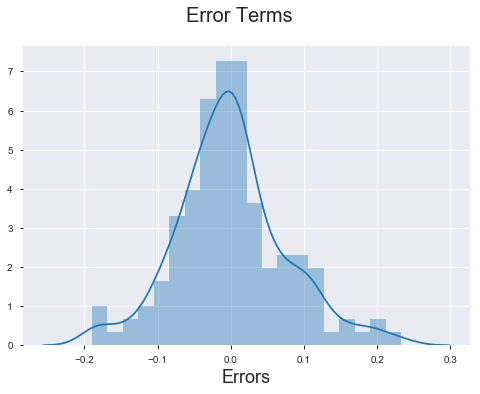

In [144]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### We broadly get a normal curve for error terms between y_train (actual) vs. y_predict (prediction on train data)

# 9. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using lr_26 model

In [145]:
car_price_df_test[num_vars] = scaler.transform(car_price_df_test[num_vars])

In [146]:
car_price_df_test.describe()

symboling  doornumber  wheelbase  carlength   carwidth  carheight  \
count  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.583871    0.564516   0.437764   0.559481   0.480376   0.559663   
std     0.271724    0.499868   0.212861   0.189947   0.165440   0.215811   
min     0.000000    0.000000   0.000000   0.056911   0.183333   0.141593   
25%     0.400000    0.000000   0.313793   0.459350   0.358333   0.384956   
50%     0.600000    1.000000   0.387931   0.547967   0.441667   0.588496   
75%     0.800000    1.000000   0.570690   0.719919   0.516667   0.699115   
max     1.000000    1.000000   1.182759   1.089431   0.975000   1.061947   

       curbweight  cylindernumber  enginesize  boreratio     stroke  \
count   62.000000       62.000000   62.000000  62.000000  62.000000   
mean     0.428470        0.232258    0.265673   0.556580   0.544314   
std      0.179488        0.088288    0.162820   0.228484   0.160738   
min      0.128394        0.200000    0.067925  -0.111111  -0.060606   
25%      0.305275        0.200000    0.177358   0.404762   0.484848   
50%      0.406129        0.200000    0.226415   0.563492   0.585859   
75%      0.564876        0.200000    0.316038   0.746032   0.641414   
max      0.935609        0.600000    0.932075   0.888889   0.863636   

       compressionratio  horsepower    peakrpm    citympg  highwaympg  \
count         62.000000   62.000000  62.000000  62.000000   62.000000   
mean           0.209375    0.248858   0.393351   0.328405    0.363993   
std            0.273690    0.163376   0.192092   0.172009    0.181845   
min            0.000000    0.016667   0.000000   0.027778   -0.027027   
25%            0.093750    0.107292   0.265306   0.166667    0.216216   
50%            0.125000    0.218750   0.346939   0.305556    0.351351   
75%            0.150000    0.295833   0.540816   0.444444    0.459459   
max            1.000000    0.662500   1.000000   0.694444    0.810811   

           price        gas      turbo       rear        fwd        rwd  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.239439   0.887097   0.177419   0.032258   0.564516   0.419355   
std     0.233076   0.319058   0.385142   0.178127   0.499868   0.497482   
min     0.007763   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.092342   1.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.158991   1.000000   0.000000   0.000000   1.000000   0.000000   
75%     0.317243   1.000000   0.000000   0.000000   1.000000   1.000000   
max     1.112855   1.000000   1.000000   1.000000   1.000000   1.000000   

         hardtop  hatchback      sedan      wagon  dohcv          l  \
count  62.000000  62.000000  62.000000  62.000000   62.0  62.000000   
mean    0.080645   0.338710   0.451613   0.096774    0.0   0.048387   
std     0.274512   0.477134   0.501716   0.298064    0.0   0.216335   
min     0.000000   0.000000   0.000000   0.000000    0.0   0.000000   
25%     0.000000   0.000000   0.000000   0.000000    0.0   0.000000   
50%     0.000000   0.000000   0.000000   0.000000    0.0   0.000000   
75%     0.000000   1.000000   1.000000   0.000000    0.0   0.000000   
max     1.000000   1.000000   1.000000   1.000000    0.0   1.000000   

             ohc       ohcf       ohcv  rotor       2bbl  4bbl        idi  \
count  62.000000  62.000000  62.000000   62.0  62.000000  62.0  62.000000   
mean    0.806452   0.048387   0.064516    0.0   0.258065   0.0   0.112903   
std     0.398304   0.216335   0.247676    0.0   0.441142   0.0   0.319058   
min     0.000000   0.000000   0.000000    0.0   0.000000   0.0   0.000000   
25%     1.000000   0.000000   0.000000    0.0   0.000000   0.0   0.000000   
50%     1.000000   0.000000   0.000000    0.0   0.000000   0.0   0.000000   
75%     1.000000   0.000000   0.000000    0.0   0.750000   0.0   0.000000   
max     1.000000   1.000000   1.000000    0.0   1.000000   0.0   1.000000   

             m

In [147]:
y_test = car_price_df_test.pop('price')
X_test = car_price_df_test

In [148]:
X_test.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'gas', 'turbo', 'rear', 'fwd', 'rwd', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [149]:
num_vars

['symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [150]:
X_test = X_test[['enginesize', 'turbo','rotor', 'bmw', 'mitsubishi', 'porsche']]

In [151]:
# Adding constant to X_test
X_test_constant = sm.add_constant(X_test)

In [152]:
y_pred = lr_26.predict(X_test_constant)

# 10. Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

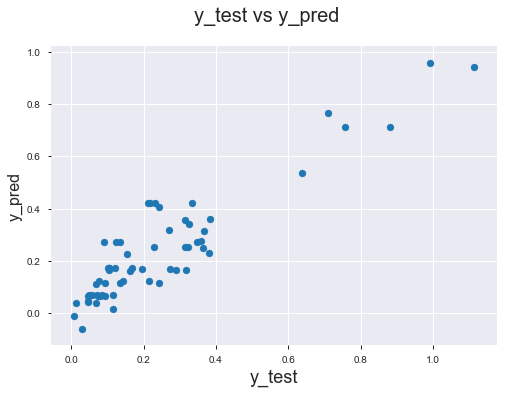

In [153]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [154]:
r2_score(y_test, y_pred)

0.8466556265667348

## Inference
>1. Adj. R-squared for Train data is 0.87
>2. R2 for test data is 0.8466 ~=0.85
>3. Difference between the two is ~2%
>4. y_test vs y_pred plot is also broadly linear
>5. Residual analysis (on train data) provides a broadly normal distribution curve

# 11. Building our model using RFE

In [155]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [156]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [157]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 43),
 ('doornumber', False, 41),
 ('wheelbase', False, 9),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 6),
 ('horsepower', False, 18),
 ('peakrpm', False, 4),
 ('citympg', False, 11),
 ('highwaympg', False, 31),
 ('gas', False, 5),
 ('turbo', False, 20),
 ('rear', True, 1),
 ('fwd', False, 40),
 ('rwd', False, 42),
 ('hardtop', False, 15),
 ('hatchback', False, 12),
 ('sedan', False, 14),
 ('wagon', False, 13),
 ('dohcv', False, 19),
 ('l', False, 3),
 ('ohc', False, 26),
 ('ohcf', False, 17),
 ('ohcv', False, 47),
 ('rotor', False, 8),
 ('2bbl', False, 38),
 ('4bbl', False, 22),
 ('idi', False, 7),
 ('mfi', False, 49),
 ('mpfi', False, 45),
 ('spdi', False, 44),
 ('spfi', False, 48),
 ('audi', False, 33),
 ('bmw', True, 1),
 ('buick', False, 39),
 ('chevrolet', False, 27),
 ('

In [158]:
# Variables that need not be eliminated
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'rear', 'bmw', 'porsche'],
      dtype='object')

In [159]:
# Variables to focus on for elimination
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'gas', 'turbo', 'fwd',
       'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [160]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [161]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [162]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [163]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.56e-66
Time:                        09:09:15   Log-Likelihood:                 194.04
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     132   BIC:                            -333.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1400      0.064      2.

In [164]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0            const  138.92
5       enginesize   36.60
4   cylindernumber   17.69
3       curbweight   12.82
1        carlength    7.36
6        boreratio    7.12
2         carwidth    6.41
7           stroke    3.34
10         porsche    2.50
8             rear    1.87
9              bmw    1.15

In [171]:
# Removing variables based on VIF > 5 above
X_train_subset11 = X_train[['enginesize','stroke','rear', 'porsche', 'bmw']]
X_train_lm = sm.add_constant(X_train_subset11)

# Create a first fitted model
lr_27 = sm.OLS(y_train, X_train_lm).fit()

In [172]:
print(lr_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.43e-47
Time:                        09:14:55   Log-Likelihood:                 134.37
No. Observations:                 143   AIC:                            -256.7
Df Residuals:                     137   BIC:                            -239.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0575      0.030     -1.945      0.0

In [173]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  13.38
4     porsche   1.55
3        rear   1.50
1  enginesize   1.20
2      stroke   1.10
5         bmw   1.08

#### Removing stroke, rear based on p-value
### Considering RFE results of variables in FALSE domain top 10
>2. Peugeot
>3. l
>4. Peakrpm
>5. gas
>6. compressionratio
>7. idi
>8. rotor
>9. wheelbase
>10. saab

In [189]:
# Adding variables based on above
X_train_subset12 = X_train[['enginesize','l','peugeot','peakrpm', 'gas', 'compressionratio','idi','rotor','porsche', 'bmw']]
X_train_lm = sm.add_constant(X_train_subset12)

# Create a first fitted model
lr_28 = sm.OLS(y_train, X_train_lm).fit()

In [190]:
print(lr_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     97.62
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.61e-54
Time:                        09:43:09   Log-Likelihood:                 162.02
No. Observations:                 143   AIC:                            -304.0
Df Residuals:                     133   BIC:                            -274.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1161      0.064  

In [191]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5                gas    inf
7                idi    inf
6   compressionratio  36.91
3            peugeot   9.14
2                  l   8.72
4            peakrpm   1.63
1         enginesize   1.29
9            porsche   1.17
8              rotor   1.16
10               bmw   1.09
0              const   0.00

In [192]:
# Removing gas, l, idi, compressionratio based on VIF and peugeot based on p-value
X_train_subset14 = X_train[['enginesize','rotor','porsche', 'bmw']]
X_train_lm = sm.add_constant(X_train_subset14)

# Create a first fitted model
lr_29 = sm.OLS(y_train, X_train_lm).fit()

In [193]:
print(lr_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.97e-54
Time:                        09:43:27   Log-Likelihood:                 147.87
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     138   BIC:                            -270.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0825      0.014     -5.778      0.0

In [194]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       const  3.80
1  enginesize  1.16
4         bmw  1.06
2       rotor  1.05
3     porsche  1.05

In [195]:
# Adding turbo, mitsubishi according to lr_26 model formed earlier
X_train_subset15 = X_train[['enginesize','rotor','porsche', 'bmw','turbo','mitsubishi']]
X_train_lm = sm.add_constant(X_train_subset15)

# Create a first fitted model
lr_30 = sm.OLS(y_train, X_train_lm).fit()

In [196]:
print(lr_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     162.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.72e-59
Time:                        09:43:41   Log-Likelihood:                 167.14
No. Observations:                 143   AIC:                            -320.3
Df Residuals:                     136   BIC:                            -299.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0850      0.013     -6.629      0.0

In [197]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       const  3.96
1  enginesize  1.20
5       turbo  1.12
4         bmw  1.08
6  mitsubishi  1.08
2       rotor  1.06
3     porsche  1.06

## Even after performing RFE and considering the True variables and top False variables (based on ranking) the best fit model still appears to be lr_26 (lr_30 recalculated).
## Therefore, the results seem to be validated

# 12. Final Conclusion based on the variables obtained

### Technical Conclusion:
>1. Adj. R-squared for Train data is 0.87
>2. R2 for test data is 0.8466 ~=0.85
>3. Difference between the two is ~2%
>4. y_test vs y_pred plot is also broadly linear
>5. Residual analysis (on train data) provides a broadly normal distribution curve
>6. Therefore, we have a stable model which is not overfitted nor underfitted and doesnt have any multi-collinearity issues

### Business Conclusion:
Looking at the variables of the final model [enginesize', 'turbo','rotor', 'bmw', 'mitsubishi', 'porsche']

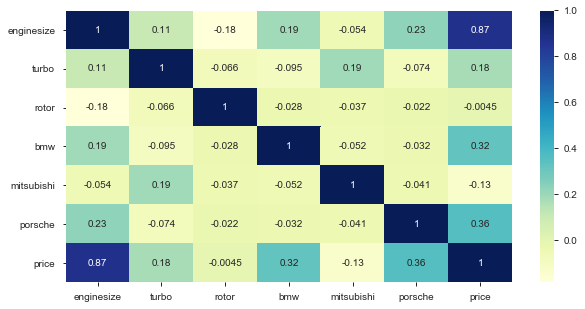

In [188]:
# Calculating Price correlation with finalized model variables
plt.figure(figsize=(10,5))
sns.heatmap(car_price_df[['enginesize', 'turbo','rotor', 'bmw', 'mitsubishi', 'porsche','price']].corr(),annot=True,cmap='YlGnBu')
plt.show()

>1. Enginesize is the standout variable which has the maximum impact on the price. Higher the size more the price
>2. In terms of brands to manufacture, Geely Auto must concentrate on brands like BMW, Porsche and Mitsubishi
>3. In terms of car components, Geely Auto must focus on producing turbo (car aspiration) and rotor (enginetype)